In [32]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# list all data in folder data/
data_files = os.listdir("data/")
data_files = [f for f in data_files if f.endswith(".csv")]

In [33]:
# read all data
import pandas as pd

from format_data import format_type

months = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}

data = {}
for f in data_files:
    df = pd.read_csv("data/" + f)

    format_type(df, pre=False)

    # add month and year columns (month is name of month)
    # date column is a Timestamp object
    df["month"] = df["date"].dt.month.map(months)
    df["year"] = df["date"].dt.year

    cols = [
        "year",
        "month",
        "abbr",
        "state",
        "location",
        "cases",
        "deaths",
        "date",
        "season",
    ]
    df = df[cols]

    data[f] = df

# Give us a cases for single year

## we will start at spring 2020 March 1st and end at winter 2021 Feb 28th 

In [34]:
year1_seasons = ["spring1.csv", "summer1.csv", "fall1.csv", "winter1.csv"]
year1 = pd.concat([data[f] for f in year1_seasons], ignore_index=True)
# sort by date
year1 = year1.sort_values(by="date")

In [35]:
year2_seasons = ["spring2.csv", "summer2.csv", "fall2.csv", "winter2.csv"]
year2 = pd.concat([data[f] for f in year2_seasons], ignore_index=True)
# sort by date
year2 = year2.sort_values(by="date")

# First of all, we want to see a summary of data

In [36]:
df = pd.concat([year1, year2], ignore_index=True)

In [37]:
# create new dataframe from date and cases
start_date = "2020-03-01"
end_date = "2022-02-28"

date_range = pd.date_range(start_date, end_date)
date_range = pd.DataFrame(date_range, columns=["date"])

# merge date_range with df
df = pd.merge(date_range, df, on="date", how="left")
df.drop(
    columns=["year", "month", "abbr", "state", "location", "deaths", "season"],
    inplace=True,
)
# sum cases by date
df = df.groupby(["date"]).sum()
df = df.reset_index()

In [38]:
df.head()

,date,cases
0,2020-03-01,39
1,2020-03-02,57
2,2020-03-03,79
3,2020-03-04,113
4,2020-03-05,184


# cases over time

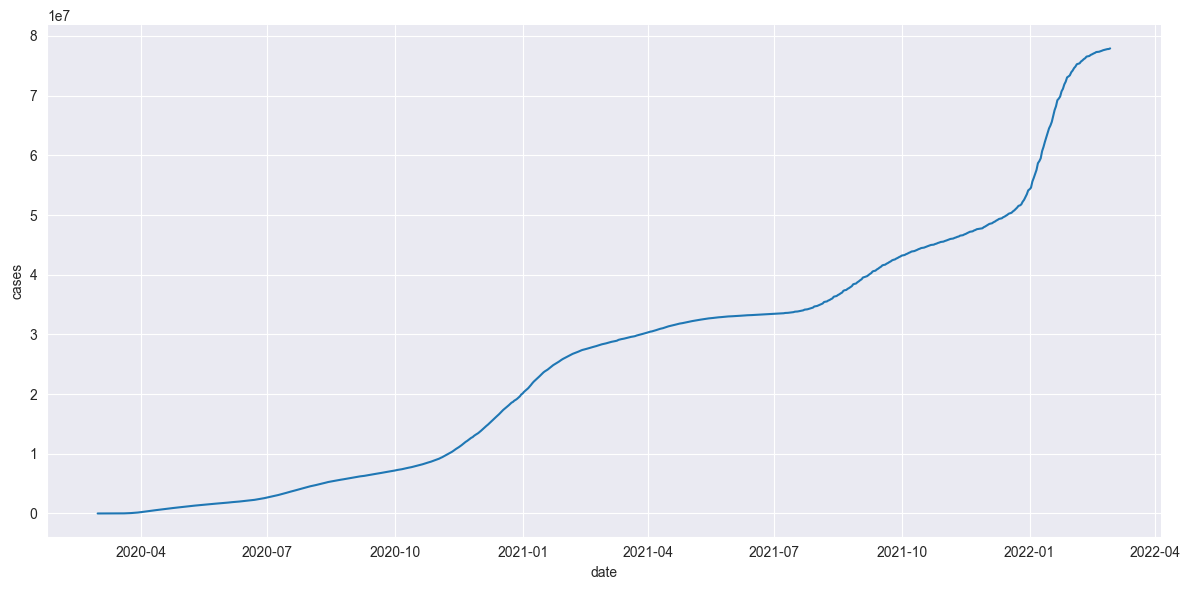

In [23]:
# plot line graph of cases over time
sns.relplot(data=df, x="date", y="cases", kind="line", height=6, aspect=2)

# Cases behavior

In [45]:
# find zero values
zero_cases = df[df["cases"] == 0]
# no zero values it means that there is no missing data

# any date cases aren't changed?
diff_cases = df[df["cases"].diff() == 0]
# no date cases aren't changed; it means every day has new cases

# any date cases are decreased?
decrease_cases = df[df["cases"].diff() < 0]

# show summary

print("zero cases: ", len(zero_cases))
print("diff cases: ", len(diff_cases))
print("decrease cases: ", len(decrease_cases))

zero cases:  0
diff cases:  0
decrease cases:  0


# differentiate by date

In [46]:
df["diff"] = df["cases"].diff()
df = df.dropna()
df = df.reset_index()
df = df.drop(columns=["index"])
df.head()

,date,cases,diff
0,2020-03-02,57,18.0
1,2020-03-03,79,22.0
2,2020-03-04,113,34.0
3,2020-03-05,184,71.0
4,2020-03-06,247,63.0


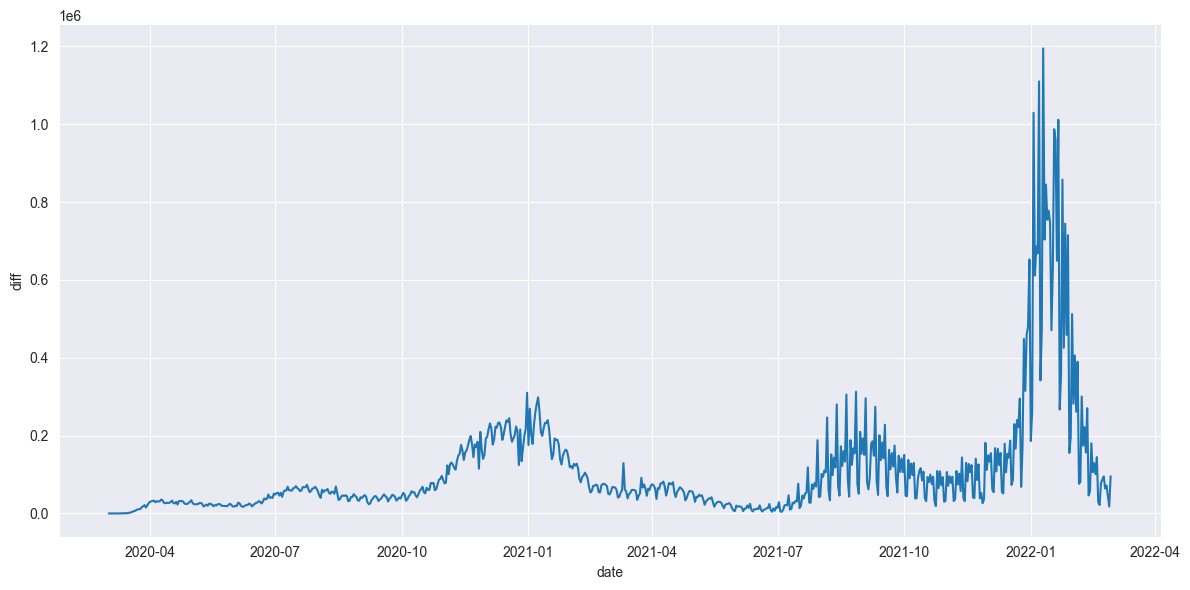

In [47]:
# plot line graph of growth rate over time
sns.relplot(data=df, x="date", y="diff", kind="line", height=6, aspect=2)

In [ ]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df,
    x="date",
    y="cases",
    col="season",
    hue="season",
    col_wrap=2,
    palette="muted",
    ci=None,
    height=4,
    scatter_kws={"s": 50, "alpha": 1},
)

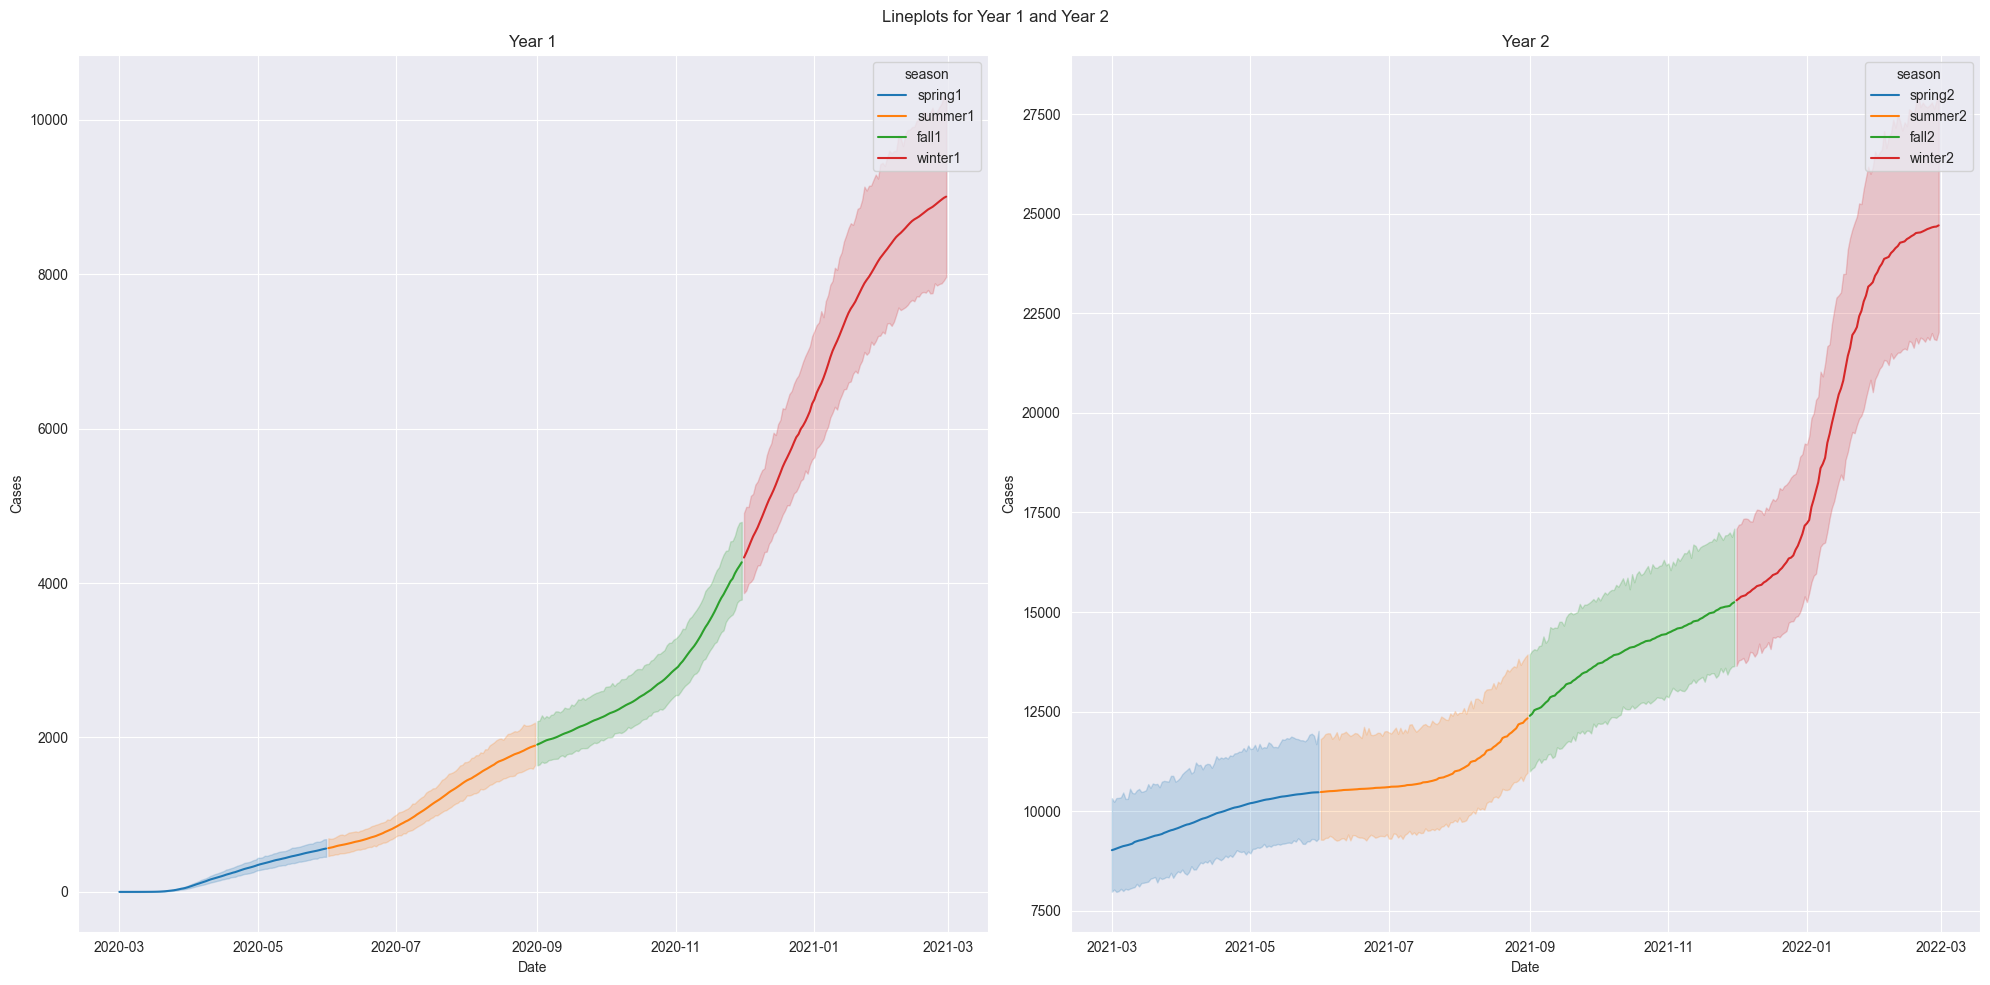

In [15]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the lineplot for "year 1" on the first subplot
sns.lineplot(data=year1, x="date", y="cases", hue="season", ax=axes[0])
axes[0].set_title("Year 1")

# Plot the lineplot for "year 2" on the second subplot
sns.lineplot(data=year2, x="date", y="cases", hue="season", ax=axes[1])
axes[1].set_title("Year 2")

# Add labels and title as needed
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Cases")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Cases")
plt.suptitle("Lineplots for Year 1 and Year 2")

# Show the subplots
plt.tight_layout()
plt.show()

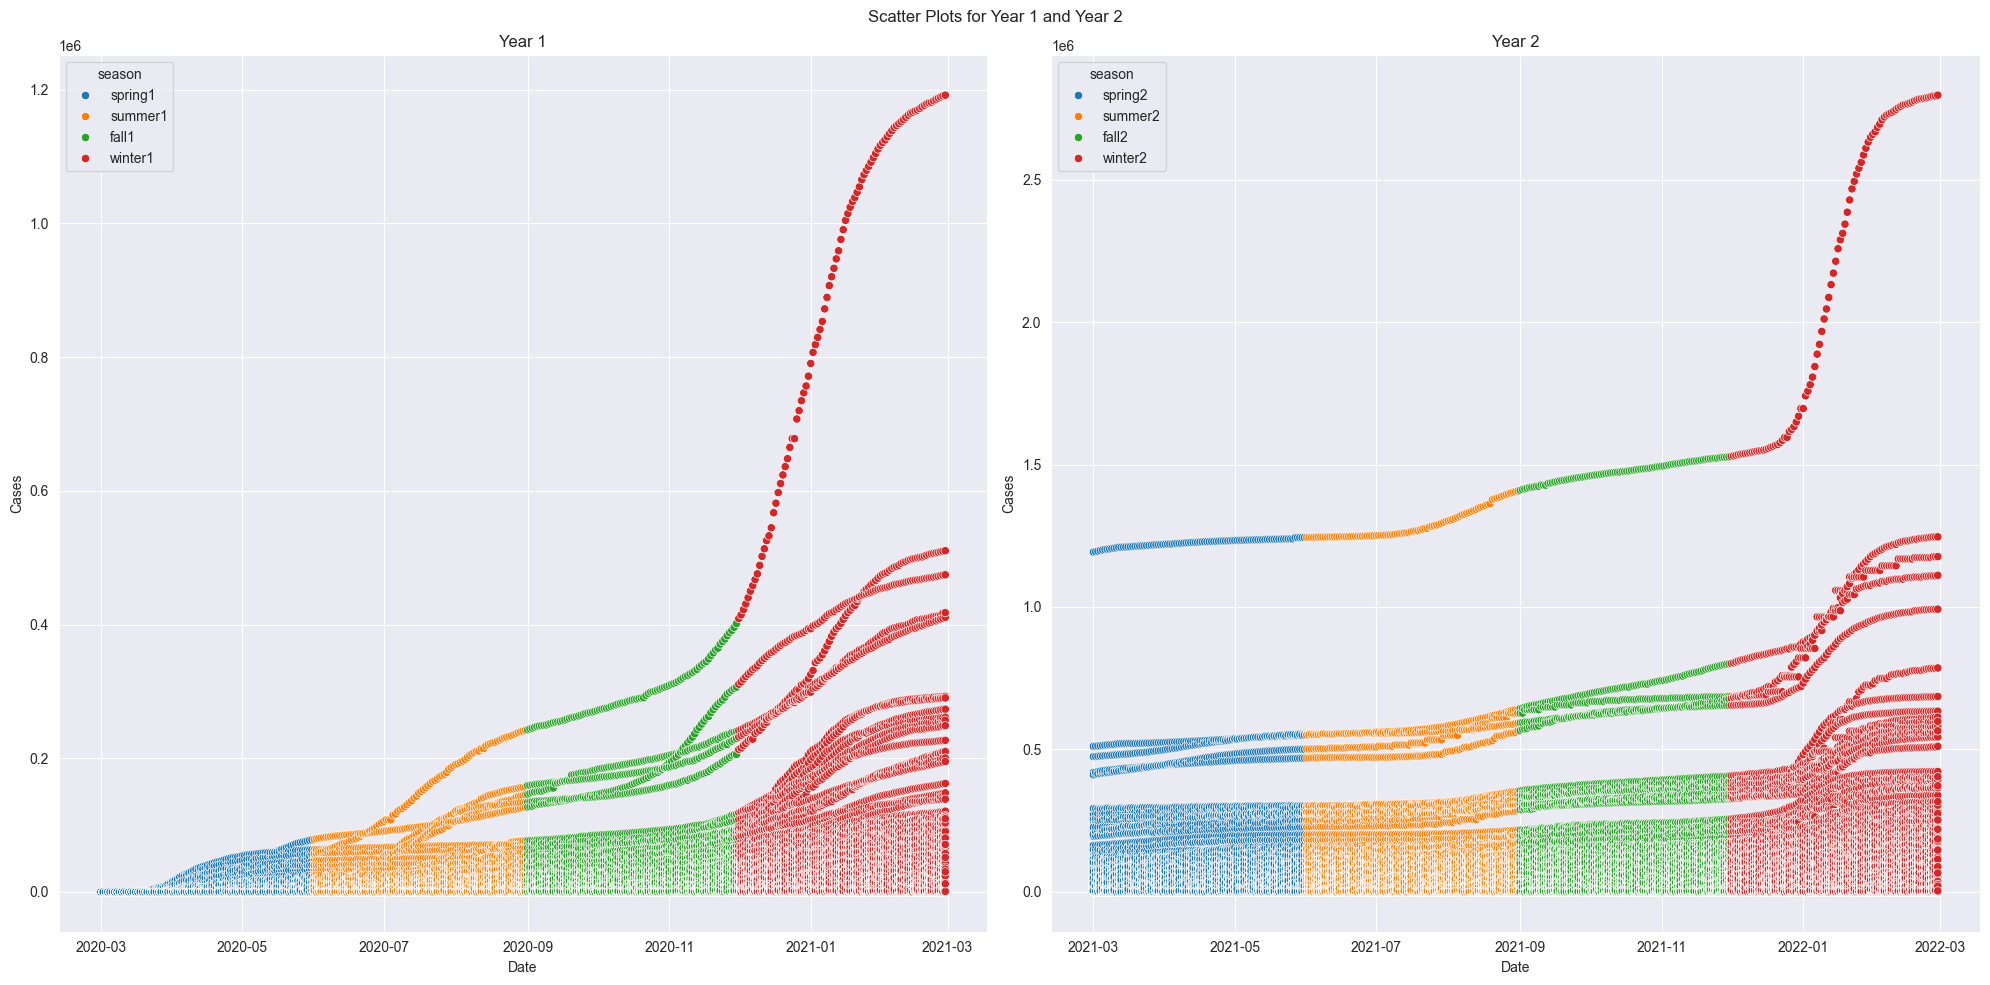

In [18]:
# Create a figure with two subplots side by side
_, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the scatter plot for "year 1" on the first subplot
sns.scatterplot(data=year1, x="date", y="cases", hue="season", ax=axes[0])
axes[0].set_title("Year 1")

# Plot the scatter plot for "year 2" on the second subplot
sns.scatterplot(data=year2, x="date", y="cases", hue="season", ax=axes[1])
axes[1].set_title("Year 2")

# Add labels and title as needed
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Cases")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Cases")
plt.suptitle("Scatter Plots for Year 1 and Year 2")

# Show the subplots
plt.tight_layout()
plt.show()

something look abnormal, let's check it

In [74]:
# find the max cases
df = pd.concat([year1, year2], ignore_index=True)
max_cases = df[df["cases"] == df["cases"].max()]
max_cases

,year,month,abbr,state,location,cases,deaths,date,season
2299815,2022,Feb,CA,California,Los Angeles,2796560,30716,2022-02-28,winter2


In [57]:
# find the min cases
min_cases = df[df["cases"] == df["cases"].min()]
print(len(min_cases))  # 123318 rows have 0 cases? it's possible?

123318


In [59]:
# find the date of min cases
min_cases_date = min_cases["date"].unique()
# min_cases_date # 2020-03-01 to 2022-02-28 (730 days) have 0 cases
print(min_cases_date.min(), min_cases_date.max())

2020-03-01 00:00:00 2022-02-28 00:00:00


In [75]:
### we will start at spring 2020 March 1st and end at winter 2022 Feb 28th
# is possible that 2020-03-01 to 2022-02-28 have 0 cases?
# try to find by diff
df.drop(columns=["year", "month", "abbr", "location", "season", "deaths"], inplace=True)
df.head()

,state,cases,date
0,Washington,0,2020-03-01
1,Oklahoma,0,2020-03-01
2,Oklahoma,0,2020-03-01
3,Pennsylvania,0,2020-03-01
4,Pennsylvania,0,2020-03-01


In [78]:
# first group it by state
df = df.groupby(["date", "state"]).sum()

df.to_csv("data/cases_by_state.csv")

In [77]:
df.head()

cases
date       state            
2020-03-01 Alabama         0
           Alaska          0
           Arizona         1
           Arkansas        0
           California     19

# For each year, we want to see the cases for each month

# Give us a cases for a single season

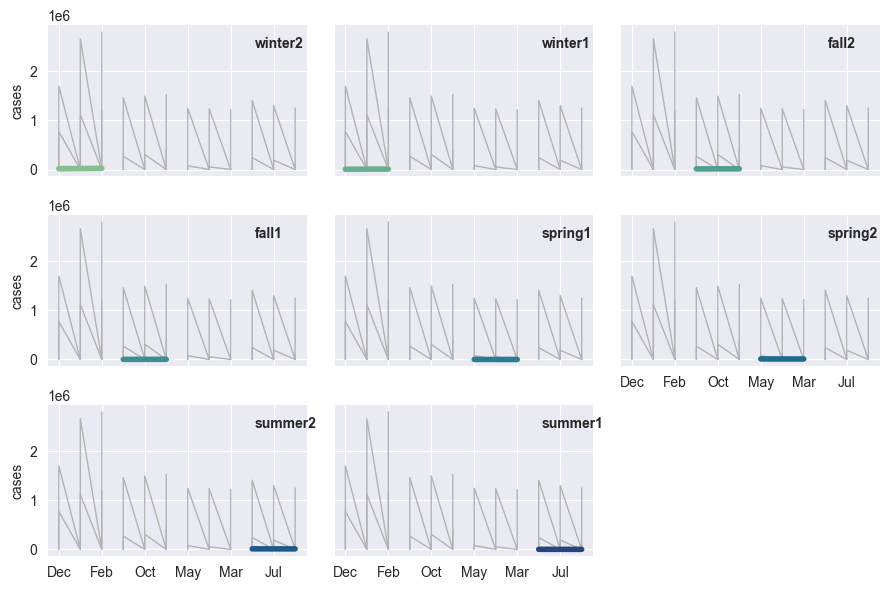

In [40]:
import seaborn as sns

g = sns.relplot(
    data=df,
    x="month",
    y="cases",
    col="season",
    hue="season",
    kind="line",
    palette="crest",
    linewidth=4,
    zorder=5,
    col_wrap=3,
    height=2,
    aspect=1.5,
    legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(0.8, 0.85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df,
        x="month",
        y="cases",
        units="season",
        estimator=None,
        color=".7",
        linewidth=1,
        ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "cases")
g.tight_layout()

## something look abnormal, let's check it